**Statistics Advanced - 2| Assignment**

**1: What is hypothesis testing in statistics?**

---

Ans: Hypothesis testing is a method in statistics used to make decisions or inferences about a population based on sample data. It involves testing an assumption the hypothesis and deciding whether there is enough evidence in the sample to support or reject it.

**2: What is the null hypothesis, and how does it differ from the alternative
hypothesis?**

---
Ans: **The null hypothesis (H₀)** is the default assumption that there is no effect, no difference, or no relationship in the population. It represents the status quo.

**The alternative hypothesis (H₁ or Ha)** is what you are trying to find evidence for. It states that there is an effect, a difference, or a relationship.




**3: Explain the significance level in hypothesis testing and its role in deciding
the outcome of a test.**

---
Ans: The significance level (α) is the probability of rejecting the null hypothesis when it is actually true. It’s a threshold we set to decide whether results are statistically significant. Common values are 0.05 or 0.01. If the p-value from the test is less than α, we reject the null hypothesis.


**4: What are Type I and Type II errors? Give examples of each.**

---
Ans: A Type I error happens when you reject the null hypothesis even though it’s actually true. It’s a false positive.

A Type II error happens when you fail to reject the null hypothesis even though it’s actually false. It’s a false negative.

**Examples:**

**Type I error (false positive):** A medical test says a healthy person has a disease.

**Type II error (false negative):** A medical test fails to detect a disease in a sick person.


**5: What is the difference between a Z-test and a T-test? Explain when to use
each.**

---
Ans: A Z-test and a T-test are both used to test hypotheses about population means, but the difference lies in what you know about the population and your sample size.

**Z-test:**

Used when the population standard deviation (σ) is known.

Best for large samples (n > 30), where the Central Limit Theorem ensures the sample mean is approximately normal.

**T-test:**

Used when the population standard deviation (σ) is unknown.

Works well for smaller samples (n ≤ 30).

Uses the sample standard deviation instead, which adds uncertainty, so the test relies on the t-distribution.

**Example:**

If you know the population variance and have 100 test scores, you’d use a Z-test.

If you only have 20 test scores and don’t know the population variance, you’d use a T-test


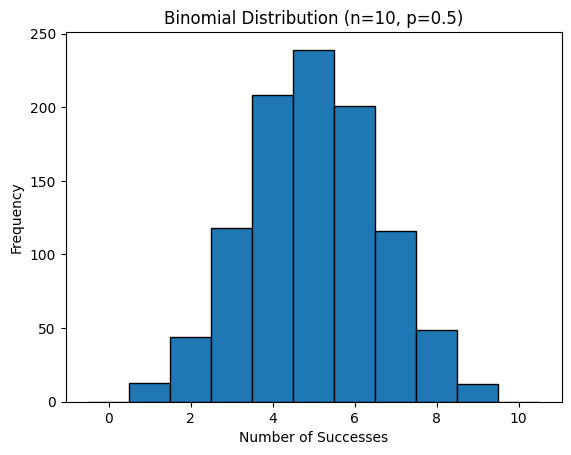

In [2]:
# 6: Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.

# Ans: import numpy as np
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10
p = 0.5
size = 1000  # number of samples

# Generate binomial distribution
data = np.random.binomial(n, p, size)

# Plot histogram
plt.hist(data, bins=range(n+2), edgecolor="black", align="left")
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.show()

In [4]:
# 7: Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.
# Ans:

import numpy as np
from scipy import stats

# Sample data
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

# Convert to numpy array
data = np.array(sample_data)

# Hypothesis: H0: mean = 50
mu0 = 50
n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=1)

# Z statistic
z = (mean - mu0) / (std / np.sqrt(n))

# p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print("Sample Mean:", mean)
print("Z Statistic:", z)
print("P-value:", p_value)

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (mean is not equal to 50).")
else:
    print("Fail to reject the null hypothesis (mean is equal to 50).")


Sample Mean: 50.08888888888889
Z Statistic: 0.9940271559503017
P-value: 0.3202096468890012
Fail to reject the null hypothesis (mean is equal to 50).


In [ ]:
# Interpretation:

# If the p-value < 0.05, we reject H₀ and conclude the mean is significantly different from 50.

# If the p-value ≥ 0.05, we fail to reject H₀ and conclude there isn’t enough evidence to say the mean differs from 50.

Sample Mean: 49.48076741302953
95% Confidence Interval: (np.float64(48.579765818190495), np.float64(50.38176900786857))


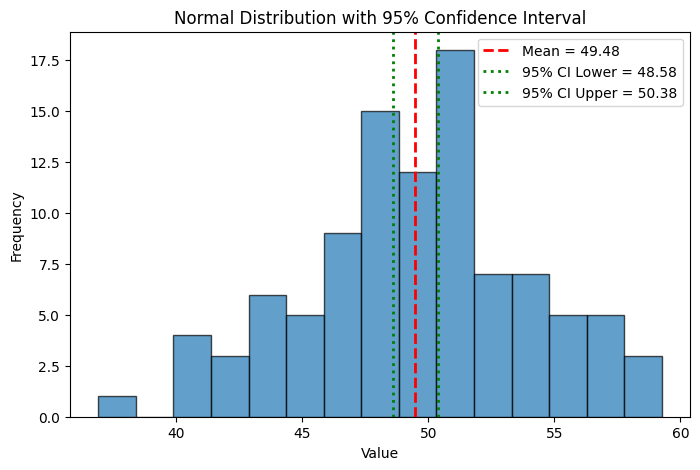

In [5]:
# 8: Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.
# Ans:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Simulate data from a normal distribution
np.random.seed(42)  # for reproducibility
data = np.random.normal(loc=50, scale=5, size=100)  # mean=50, std=5, n=100

# Step 2: Calculate sample mean and standard error
mean = np.mean(data)
std_err = stats.sem(data)  # standard error of the mean

# Step 3: Calculate 95% confidence interval
confidence = 0.95
ci = stats.t.interval(confidence, df=len(data)-1, loc=mean, scale=std_err)

print("Sample Mean:", mean)
print("95% Confidence Interval:", ci)

# Step 4: Plot the data
plt.figure(figsize=(8,5))
plt.hist(data, bins=15, edgecolor="black", alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean:.2f}")
plt.axvline(ci[0], color='green', linestyle='dotted', linewidth=2, label=f"95% CI Lower = {ci[0]:.2f}")
plt.axvline(ci[1], color='green', linestyle='dotted', linewidth=2, label=f"95% CI Upper = {ci[1]:.2f}")
plt.title("Normal Distribution with 95% Confidence Interval")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()



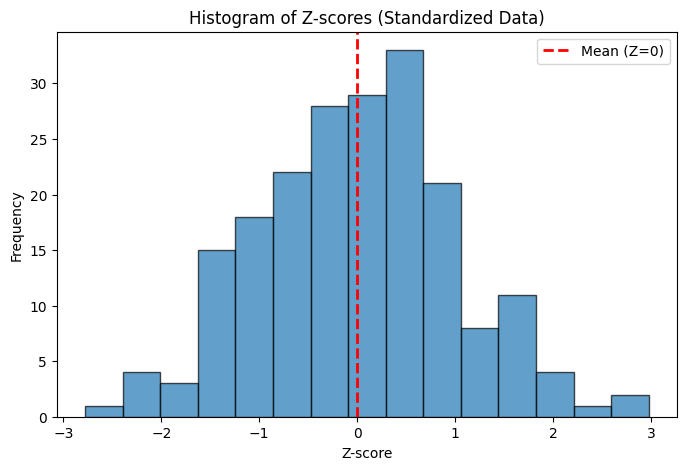

First 10 Z-scores: [ 0.57876651 -0.10498128  0.74133645  1.68390811 -0.20823509 -0.20821741
  1.74440619  0.87027971 -0.46162987  0.62813359]


In [6]:
# 9: Write a Python function to calculate the Z-scores from a dataset and
# visualize the standardized data using a histogram. Explain what the Z-scores represent
# in terms of standard deviations from the mean.

# Ans:
import numpy as np
import matplotlib.pyplot as plt

def z_scores_histogram(data):
    # Step 1: Calculate mean and standard deviation
    mean = np.mean(data)
    std = np.std(data)

    # Step 2: Calculate Z-scores
    z_scores = (data - mean) / std

    # Step 3: Plot histogram of Z-scores
    plt.figure(figsize=(8,5))
    plt.hist(z_scores, bins=15, edgecolor="black", alpha=0.7)
    plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label="Mean (Z=0)")
    plt.title("Histogram of Z-scores (Standardized Data)")
    plt.xlabel("Z-score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    return z_scores

# Example usage
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=200)  # normal distribution
z = z_scores_histogram(data)

print("First 10 Z-scores:", z[:10])


In [ ]:
# Explanation of Z-scores

# A Z-score tells you how many standard deviations a data point is away from the mean.

# Z = 0: The value is exactly at the mean.

# Z = +1: The value is 1 standard deviation above the mean.

# Z = -2: The value is 2 standard deviations below the mean.